# OpenCV : Image Arithetics and Logic

#### Importing essential libraries

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Reading images using OpenCV-imread and converting them into numpy-array

In [2]:
image1 = cv.imread('testCV1.jpeg', cv.IMREAD_COLOR)
image2 = cv.imread('testCV2.jpeg', cv.IMREAD_COLOR)
image1 = np.array(image1)
image2 = np.array(image2)

#### Defining a function to display 3 images in a row using matplotlib

In [3]:
def display(images, titles = None, cmap = 'gray', save = False, fname = None):
    col = 3
    row = len(images)/(col-1)+1
    fig = plt.figure(figsize=(16,16))
    for i in range(len(images)):
        ax = fig.add_subplot(row, col, i+1)
        if(titles != None):
            ax.set_title(titles[i])
        plt.imshow(images[i], cmap = cmap)
    if(save == True):
        fig.savefig(fname = fname)
    plt.show()

#### Resizing image2 to the shape of image1 to perform addition

In [4]:
image2 = cv.resize(image2, (image1.shape[1], image1.shape[0]), interpolation=cv.INTER_AREA)

#### Adding images using numpy

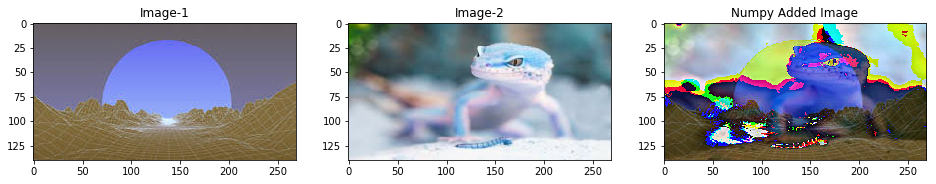

In [5]:
added = image1 + image2
images = [image1, image2, added]
titles = ['Image-1', 'Image-2', 'Numpy Added Image']
display(images, titles)

#### Adding images using OpenCV
###### Numpy addition and OpenCV addition are different
As Numpy addition is a modulo addition. Like in numpy image-addiotion 250 + 10 will be 260%256 = 4.
But OpenCV is a saturated operation as in OpenCV image-addition 250 + 10 will be 255 as values greater than 255 will be reduced to 255.
##### It's better choice to use OpenCV-addition as it give saturated and better visble image.

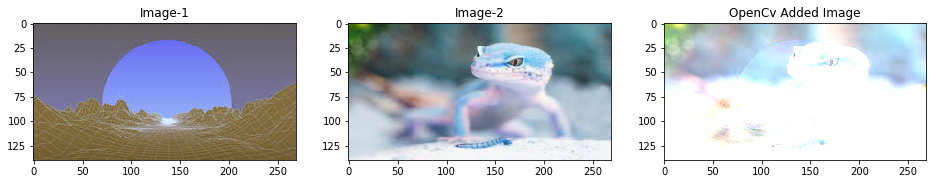

In [6]:
images[2] = cv.add(image1, image2)
titles = ['Image-1', 'Image-2', 'OpenCv Added Image']
display(images, titles)

#### Weighted Addition
##### This is also called Image-Blending
In this addition we add images with different weights.

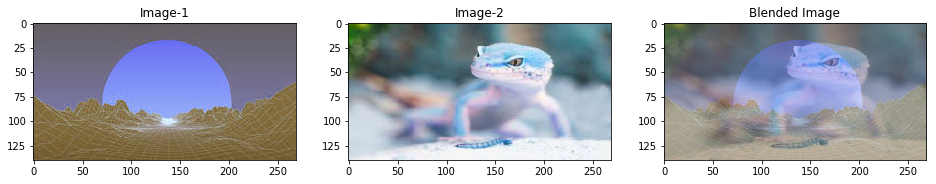

In [7]:
images[2] = cv.addWeighted(image1,0.5,image2,0.5,0)
titles = ['Image-1', 'Image-2', 'Blended Image']
display(images, titles)

#### Placing Python-logo on a matplotlib image

##### Reading two images, resizing Python-logo 10 100x100 and converting them into numpy array

In [8]:
python_logo = cv.imread('python_test.jpeg', cv.IMREAD_COLOR)
matplot_image = cv.imread('matplot_test.png', cv.IMREAD_COLOR)
python_logo = cv.resize(python_logo, (100, 100), interpolation=cv.INTER_AREA)
python_logo = np.array(python_logo)
matplot_image = np.array(matplot_image)

##### Displaying the images

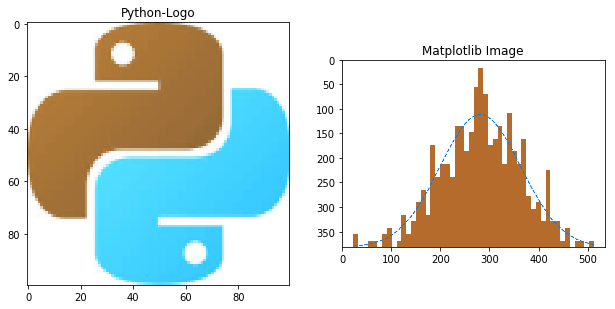

In [9]:
images = [python_logo, matplot_image]
titles = ['Python-Logo', 'Matplotlib Image']
display(images, titles)

##### Creating ROI to put the python-logo on the top-left corner

In [10]:
rows, cols, channels = python_logo.shape
roi = matplot_image[0:rows, 0:cols]

##### Performing Bitwise and Arithmetic operations and displaying the generated images

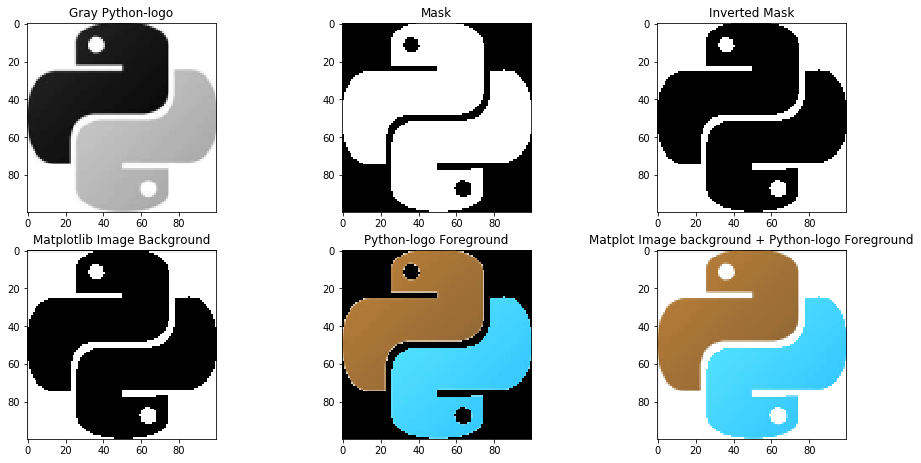

In [11]:
# Converting th RGB image to Grayscale
grayPython = cv.cvtColor(python_logo, cv.COLOR_BGR2GRAY)

# Adding a threshold
ret, mask = cv.threshold(grayPython, 220, 255, cv.THRESH_BINARY_INV)

# Inverting the mask
mask_inv = cv.bitwise_not(mask)

# Making the area of python logo block in ROI
matplot_image_bg = cv.bitwise_and(roi, roi, mask=mask_inv)

# Taking only image of Python logo from logo image
python_logo_fg = cv.bitwise_and(python_logo, python_logo, mask = mask)

# Adding Neccessary pixels from ROI of both the images
dst = cv.add(matplot_image_bg, python_logo_fg)

images = [grayPython, mask, mask_inv, matplot_image_bg, python_logo_fg, dst]
titles = ['Gray Python-logo', 'Mask', 'Inverted Mask', 'Matplotlib Image Background', 'Python-logo Foreground', 'Matplot Image background + Python-logo Foreground']
display(images, titles)

##### Placing the ROI image to the Matplotlib image, dispaying and saving it...

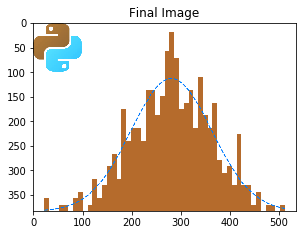

In [12]:
matplot_image[0:rows, 0:cols] = dst
title = ['Final Image']
display([matplot_image], title, save = True, fname = 'Final Image')